# Bibliotecas utilizadas


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pylab
from typing import List, Tuple


# Leitura dos arquivos

In [2]:
df_chromecast = pd.read_csv(r"C:\Users\luizg\Downloads\dataset_chromecast.csv")
df_smart_tv = pd.read_csv(r"C:\Users\luizg\Downloads\dataset_smart-tv.csv")

# Pré-Processamento dos Dados

## Criando as colunas de Log_10

### Chromecast

In [3]:
df_chromecast["log_bytes_up"] = np.log10(df_chromecast["bytes_up"] + 1)
df_chromecast["log_bytes_down"] = np.log10(df_chromecast["bytes_down"] + 1)

### Smart TV

In [4]:
df_smart_tv["log_bytes_up"] = np.log10(df_smart_tv["bytes_up"] + 1)
df_smart_tv["log_bytes_down"] = np.log10(df_smart_tv["bytes_down"] + 1)

## Criando a coluna de hora

### Chromecast


In [5]:
df_chromecast["hour"] = df_chromecast["date_hour"].apply(
    lambda x: int(x.split(" ")[1].split(":")[0]))

### Smart TV

In [6]:
df_smart_tv["hour"] = df_smart_tv["date_hour"].apply(
    lambda x: int(x.split(" ")[1].split(":")[0]))

# Estatísticas Gerais

## Cálculo do tamanho do "bin" (Utilizando o método de Sturges)

In [7]:
def get_bin(data):
    return int(1 + np.log2(len(data)))

### Histograma

#### Chromecast

Text(0.5, 1.0, 'Histograma do Chromecast de Log₁₀(Bytes de Upload)')

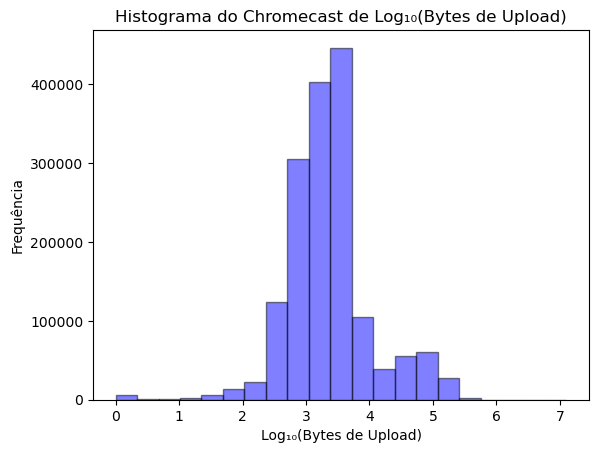

In [8]:
fig = plt.figure()
plt.hist(
    df_chromecast["log_bytes_up"],
    bins=get_bin(df_chromecast["log_bytes_up"]),
    color="blue",
    alpha=0.5,
    edgecolor="black",
)
plt.xlabel("Log₁₀(Bytes de Upload)")
plt.ylabel("Frequência")
plt.title("Histograma do Chromecast de Log₁₀(Bytes de Upload)")

Text(0.5, 1.0, 'Histograma do Chromecast de Log₁₀(Bytes de Download)')

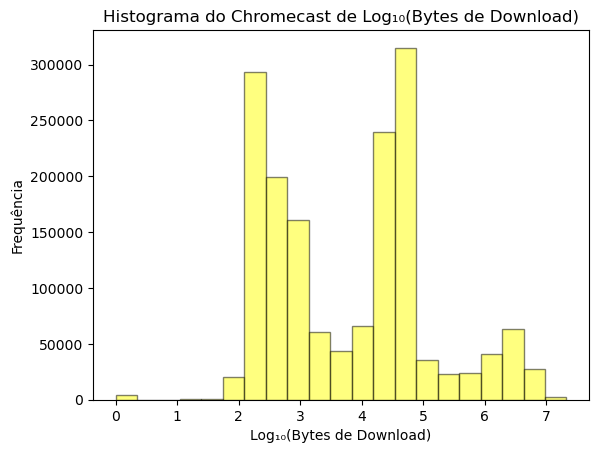

In [9]:
fig = plt.figure()
plt.hist(
    df_chromecast["log_bytes_down"],
    bins=get_bin(df_chromecast["log_bytes_down"]),
    color="yellow",
    alpha=0.5,
    edgecolor="black",
)
plt.xlabel("Log₁₀(Bytes de Download)")
plt.ylabel("Frequência")
plt.title("Histograma do Chromecast de Log₁₀(Bytes de Download)")

#### Smart-TV

Text(0.5, 1.0, 'Histograma da Smart TV de Log₁₀(Bytes de Upload)')

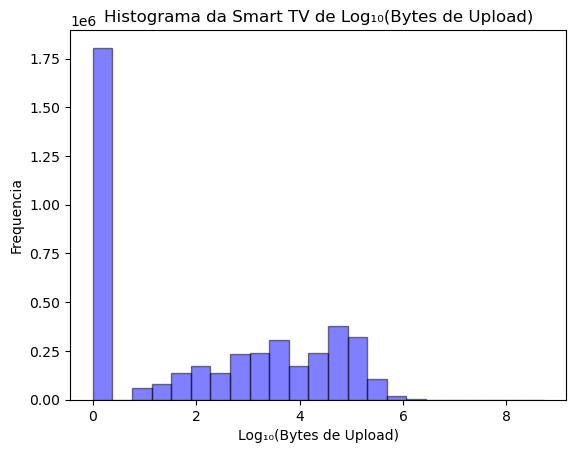

In [10]:
fig = plt.figure()
plt.hist(
    df_smart_tv["log_bytes_up"],
    bins=get_bin(df_smart_tv["log_bytes_up"]),
    color="blue",
    alpha=0.5,
    edgecolor="black",
)
plt.xlabel("Log₁₀(Bytes de Upload)")
plt.ylabel("Frequencia")
plt.title("Histograma da Smart TV de Log₁₀(Bytes de Upload)")

Text(0.5, 1.0, 'Histograma da Smart TV de Log₁₀(Bytes de Download)')

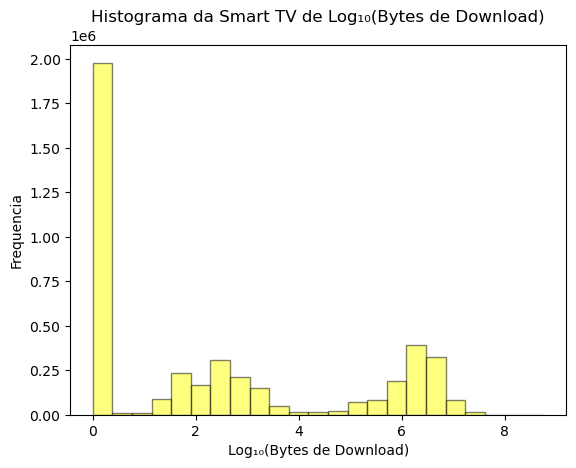

In [11]:
fig = plt.figure()
plt.hist(
    df_smart_tv["log_bytes_down"],
    bins=get_bin(df_smart_tv["log_bytes_down"]),
    color="yellow",
    alpha=0.5,
    edgecolor="black",
)
plt.xlabel("Log₁₀(Bytes de Download)")
plt.ylabel("Frequencia")
plt.title("Histograma da Smart TV de Log₁₀(Bytes de Download)")

### Função Distribuição Empírica

#### Chromecast

Text(0.5, 1.0, 'Função Distribuição Empírica de Log₁₀(Bytes de Upload) para o Chromecast')

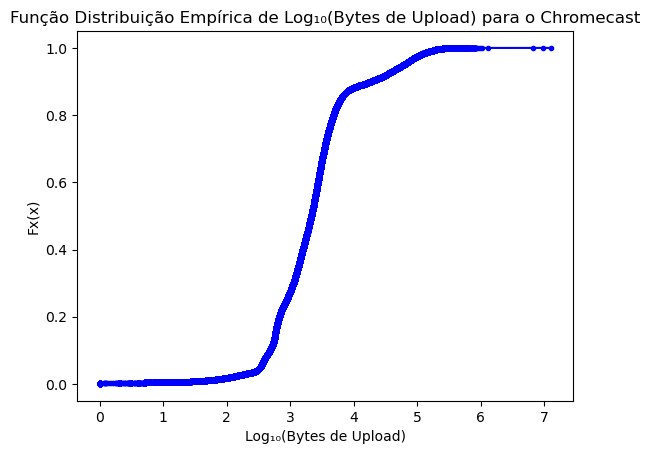

In [12]:
fig = plt.figure()
plt.plot(
    df_chromecast["log_bytes_up"].sort_values(),
    np.linspace(0, 1, len(df_chromecast["log_bytes_up"])),
    color="blue",
    marker=".",
)
plt.xlabel("Log₁₀(Bytes de Upload)")
plt.ylabel("Fx(x)")
plt.title("Função Distribuição Empírica de Log₁₀(Bytes de Upload) para o Chromecast")

Text(0.5, 1.0, 'Função Distribuição Empírica de Log₁₀(Bytes de Download) para o Chromecast')

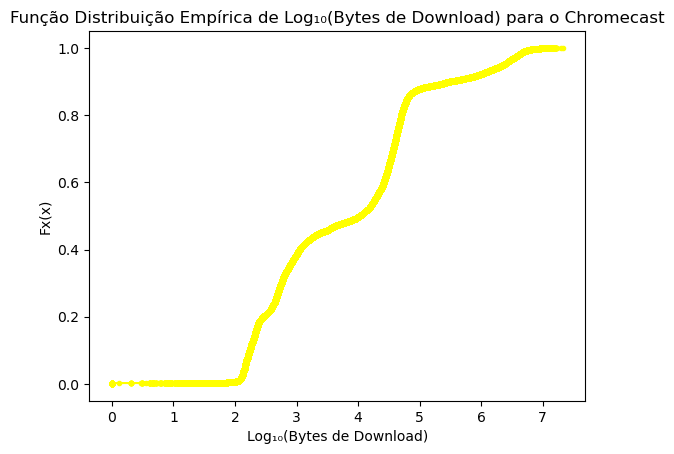

In [13]:
fig = plt.figure()
plt.plot(
    df_chromecast["log_bytes_down"].sort_values(),
    np.linspace(0, 1, len(df_chromecast["log_bytes_down"])),
    color="yellow",
    marker=".",
)
plt.xlabel("Log₁₀(Bytes de Download)")
plt.ylabel("Fx(x)")
plt.title("Função Distribuição Empírica de Log₁₀(Bytes de Download) para o Chromecast")

#### Smart TV

Text(0.5, 1.0, 'Função Distribuição Empírica de Log₁₀(Bytes de Upload) para a Smart TV')

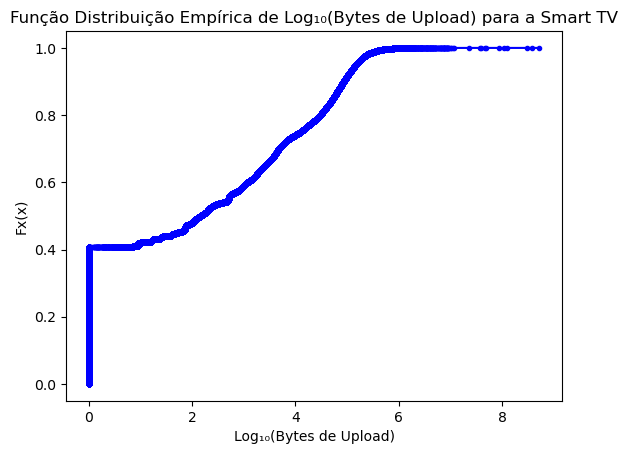

In [14]:
fig = plt.figure()
plt.plot(
    df_smart_tv["log_bytes_up"].sort_values(),
    np.linspace(0, 1, len(df_smart_tv["log_bytes_up"])),
    color="blue",
    marker=".",
)
plt.xlabel("Log₁₀(Bytes de Upload)")
plt.ylabel("Fx(x)")
plt.title("Função Distribuição Empírica de Log₁₀(Bytes de Upload) para a Smart TV")

Text(0.5, 1.0, 'Função Distribuição Empírica de Log₁₀(Bytes de Download) para a Smart TV')

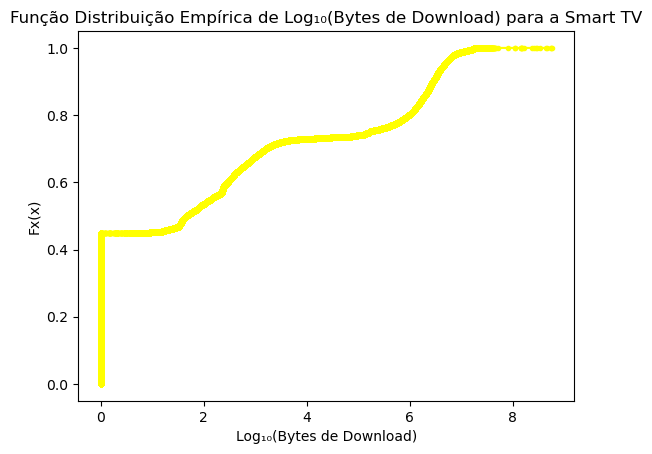

In [15]:
fig = plt.figure()
plt.plot(
    df_smart_tv["log_bytes_down"].sort_values(),
    np.linspace(0, 1, len(df_smart_tv["log_bytes_down"])),
    color="yellow",
    marker=".",
)
plt.xlabel("Log₁₀(Bytes de Download)")
plt.ylabel("Fx(x)")
plt.title("Função Distribuição Empírica de Log₁₀(Bytes de Download) para a Smart TV")

### Box plot

#### Chromecast

Text(0.5, 1.0, 'Chromecast Boxplots')

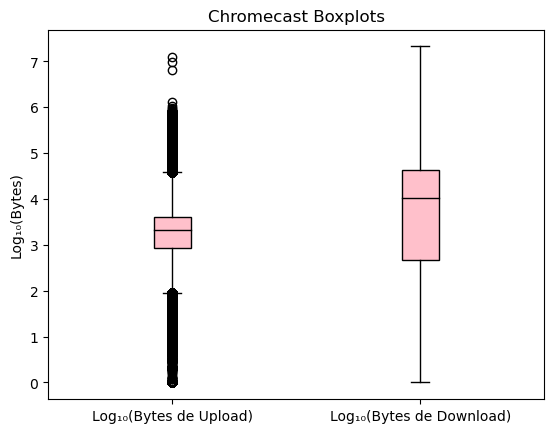

In [16]:
fig = plt.figure()
plt.boxplot(
    [df_chromecast["log_bytes_up"], df_chromecast["log_bytes_down"]],
    labels=["Log₁₀(Bytes de Upload)", "Log₁₀(Bytes de Download)"],
    patch_artist=True,
    boxprops=dict(facecolor="pink", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("Log₁₀(Bytes)")
plt.title("Chromecast Boxplots")

#### Smart TV

Text(0.5, 1.0, 'Smart TV Boxplots')

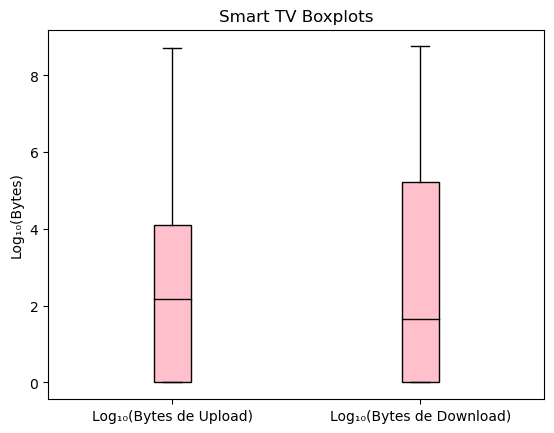

In [17]:
fig = plt.figure()
plt.boxplot(
    [df_smart_tv["log_bytes_up"], df_smart_tv["log_bytes_down"]],
    labels=["Log₁₀(Bytes de Upload)", "Log₁₀(Bytes de Download)"],
    patch_artist=True,
    boxprops=dict(facecolor="pink", color="black"),
    medianprops=dict(color="black"),
    whiskerprops=dict(color="black"),
    capprops=dict(color="black"),
)
plt.ylabel("Log₁₀(Bytes)")
plt.title("Smart TV Boxplots")

### Média, Variância e Desvio Padrão

#### Chromecast

In [18]:
#Upload
cast_mean_upload = df_chromecast["log_bytes_up"].mean()
cast_var_upload = df_chromecast["log_bytes_up"].var()
cast_std_upload = df_chromecast["log_bytes_up"].std()
print(f"média UP: {cast_mean_upload} \n Variância UP: {cast_var_upload} \n Desvio Padrão UP: {cast_std_upload}")

#download do chromecast
cast_mean_download = df_chromecast["log_bytes_down"].mean()
cast_var_download = df_chromecast["log_bytes_down"].var()
cast_std_download = df_chromecast["log_bytes_down"].std()
print(f"média DOWN: {cast_mean_download} \n Variância DOWN: {cast_var_download} \n Desvio Padrão DOWN: {cast_std_download}")

média UP: 3.3502996618084153 
 Variância UP: 0.45996864629952516 
 Desvio Padrão UP: 0.6782098836639917
média DOWN: 3.800045706037558 
 Variância DOWN: 1.6638955993658944 
 Desvio Padrão DOWN: 1.2899207725150774


#### Smart TV

In [19]:
#Upload da smart tv
smart_mean_upload = df_smart_tv["log_bytes_up"].mean()
smart_var_upload = df_smart_tv["log_bytes_up"].var()
smart_std_upload = df_smart_tv["log_bytes_up"].std()
print(f"média UP: {smart_mean_upload} \n Variância UP: {smart_var_upload} \n Desvio Padrão UP: {smart_std_upload}")


#download da smart tv
smart_mean_download = df_smart_tv["log_bytes_down"].mean()
smart_var_download = df_smart_tv["log_bytes_down"].var()
smart_std_download = df_smart_tv["log_bytes_down"].std()
print(f"média DOWN: {smart_mean_download} \n Variância DOWN: {smart_var_download} \n Desvio Padrão DOWN: {smart_std_download}")

média UP: 2.158288206507635 
 Variância UP: 4.110139344625843 
 Desvio Padrão UP: 2.0273478597975836
média DOWN: 2.351678620482737 
 Variância DOWN: 6.721323897352814 
 Desvio Padrão DOWN: 2.5925516190334212


# Estatísticas por horário

## Box plot

### Chromecast

C:\Users\luizg\AppData\Local\Temp\ipykernel_4700\4201681341.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


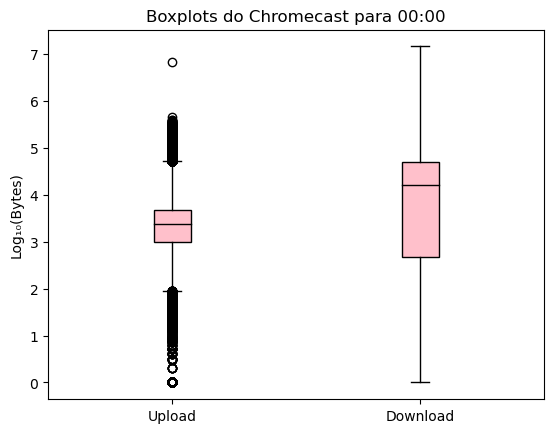

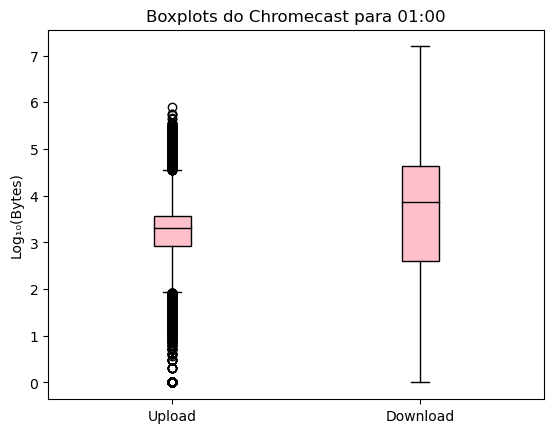

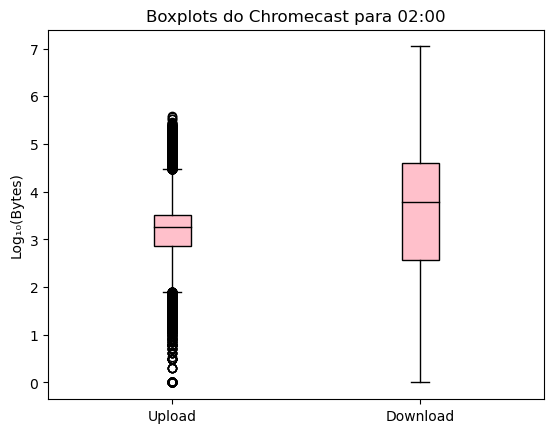

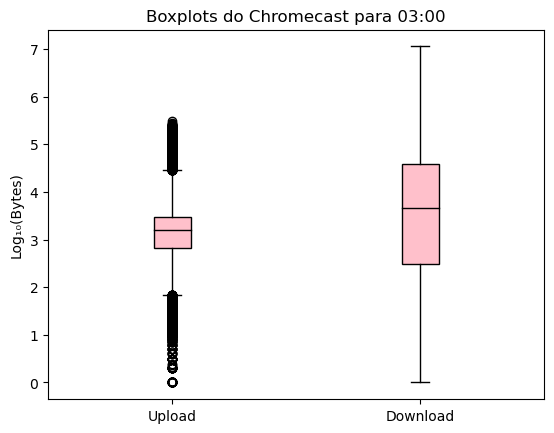

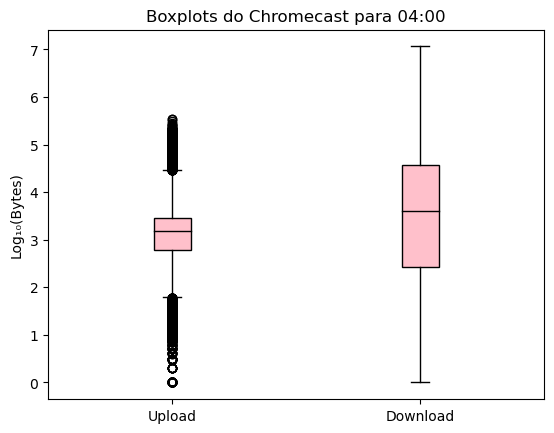

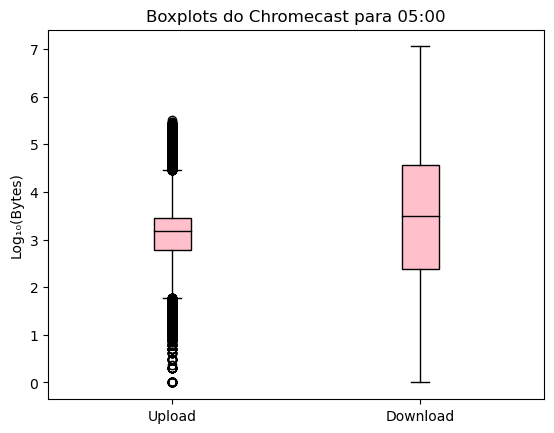

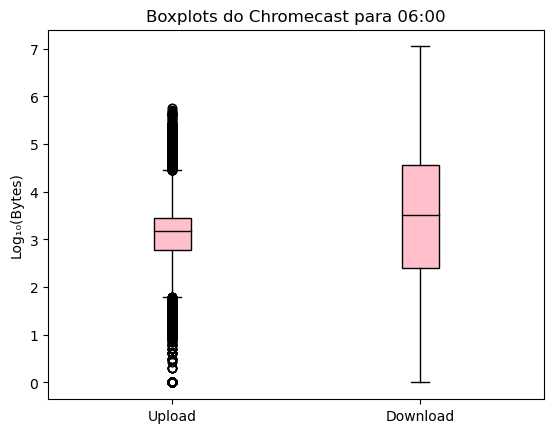

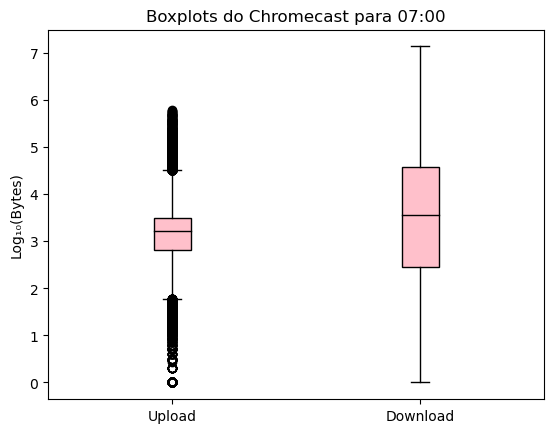

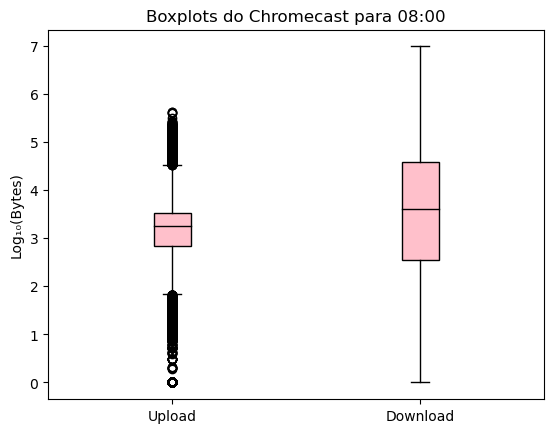

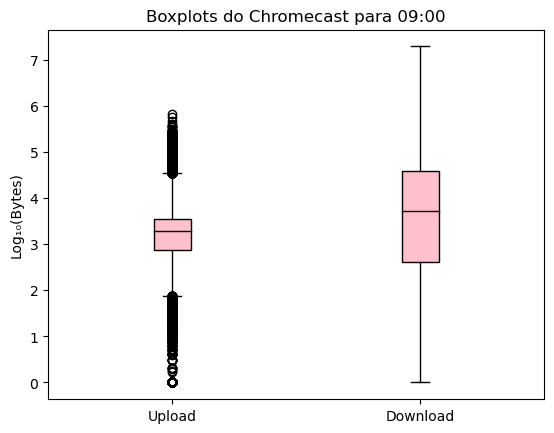

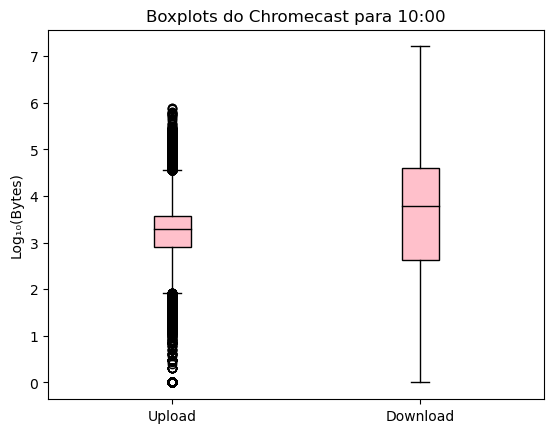

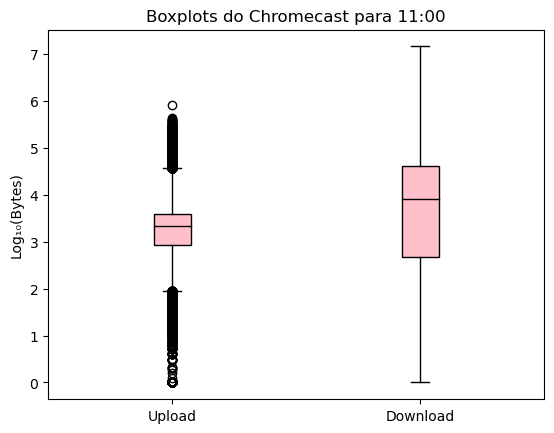

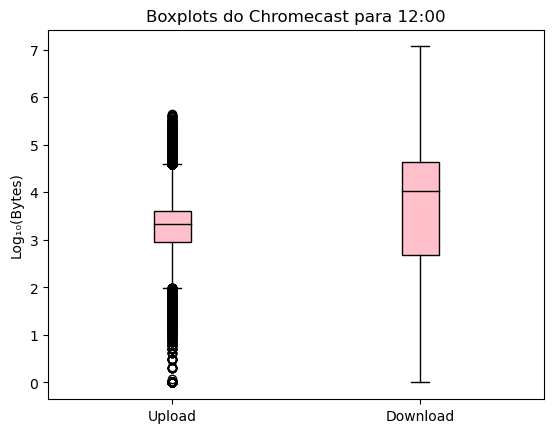

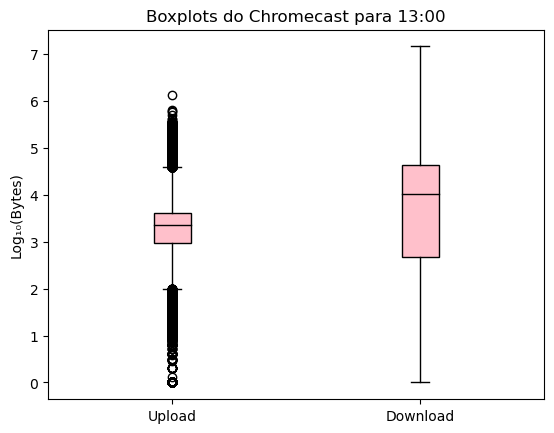

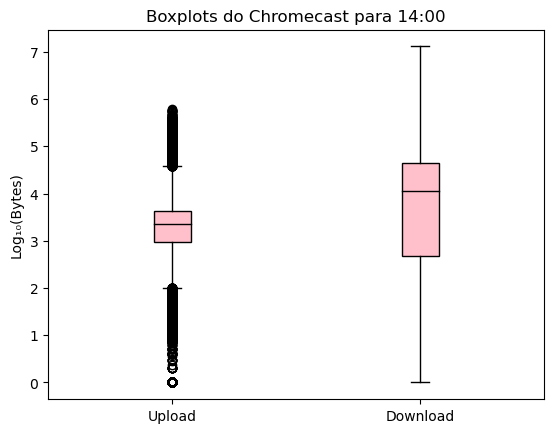

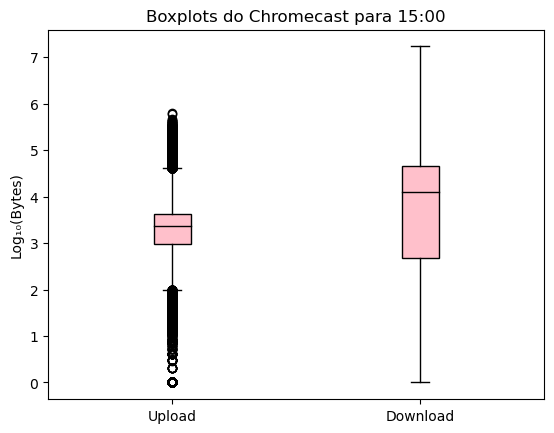

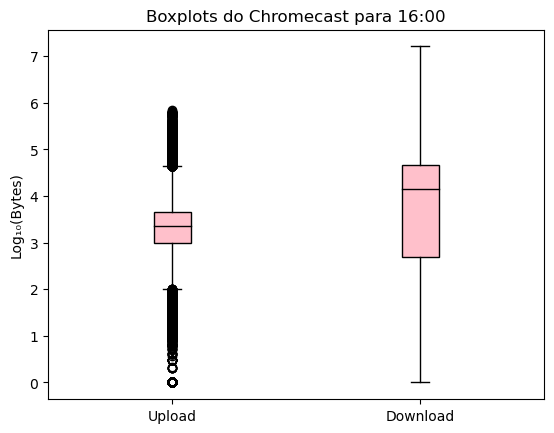

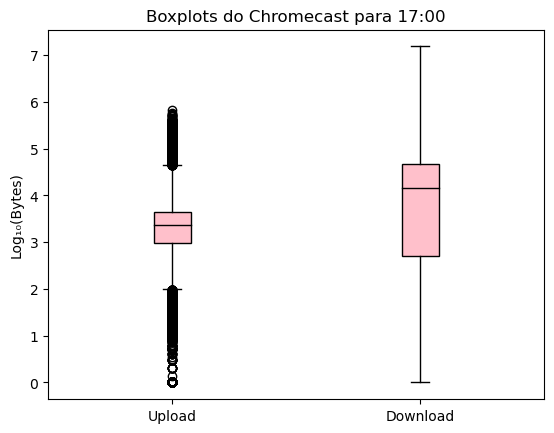

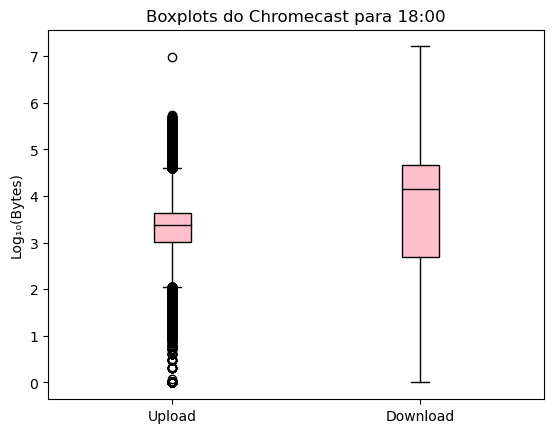

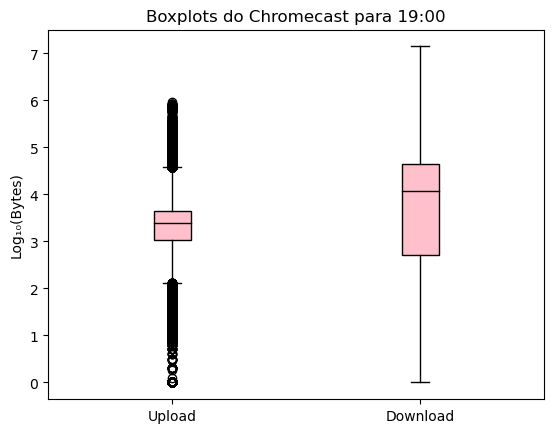

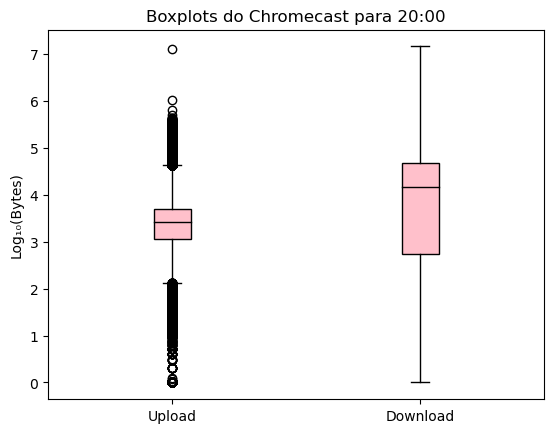

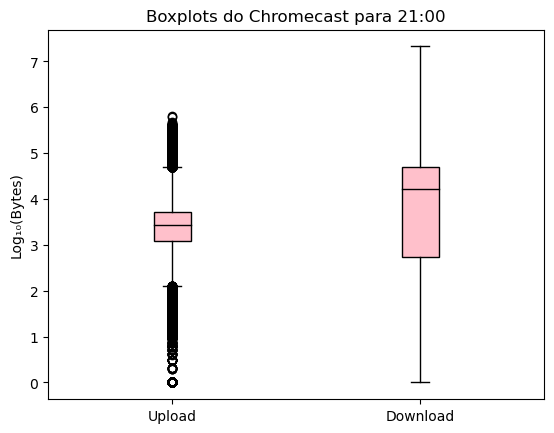

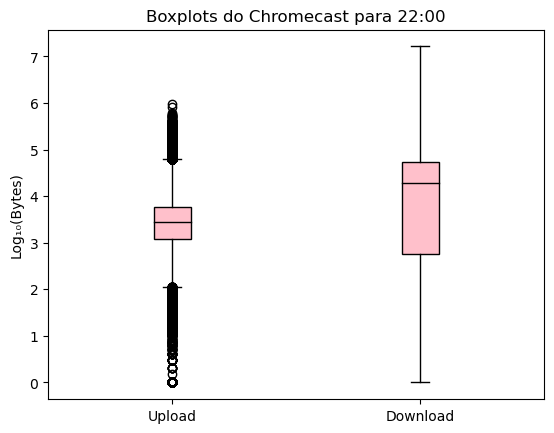

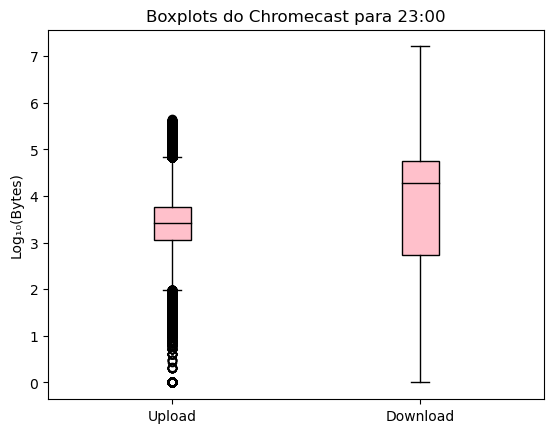

In [20]:
for hour in range(0, 24):
    fig = plt.figure()
    plt.boxplot(
        [
            df_chromecast[df_chromecast["hour"] == hour]["log_bytes_up"],
            df_chromecast[df_chromecast["hour"] == hour]["log_bytes_down"],
        ],
        labels=["Upload", "Download"],
        patch_artist=True,
        boxprops=dict(facecolor="pink", color="black"),
        medianprops=dict(color="black"),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
    )
    plt.ylabel("Log₁₀(Bytes)")
    plt.title(f"Boxplots do Chromecast para {hour:02d}:00")

### Smart TV

C:\Users\luizg\AppData\Local\Temp\ipykernel_4700\3435589955.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = plt.figure()


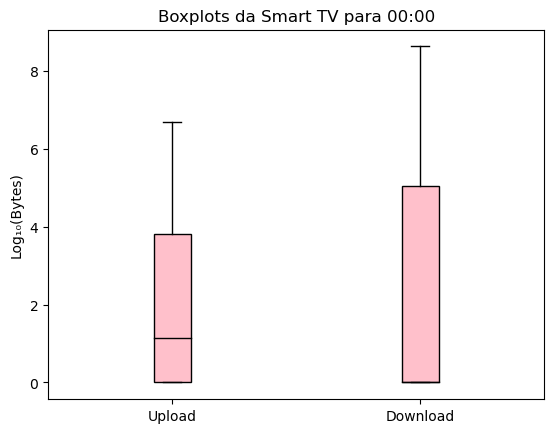

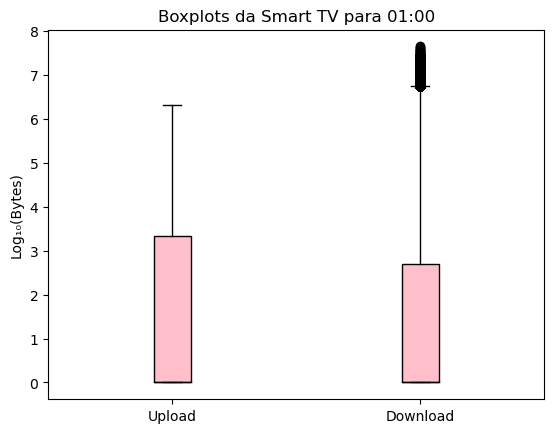

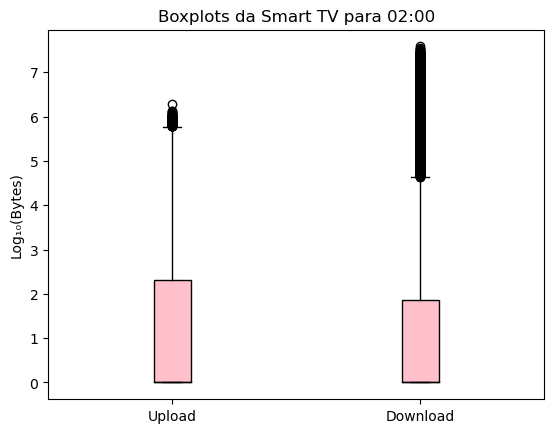

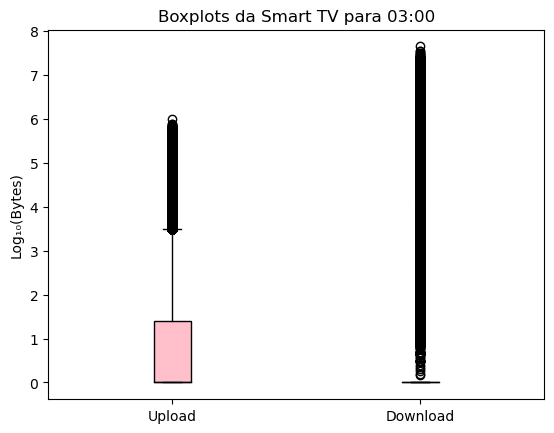

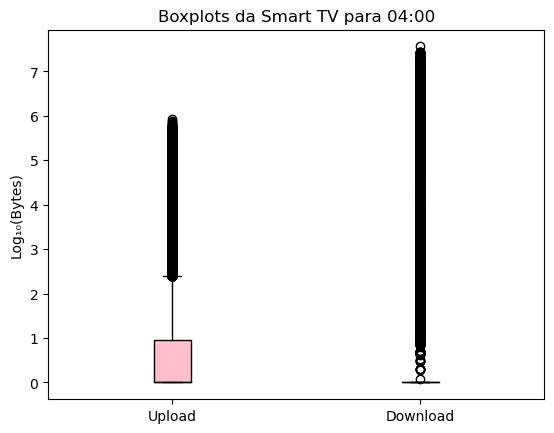

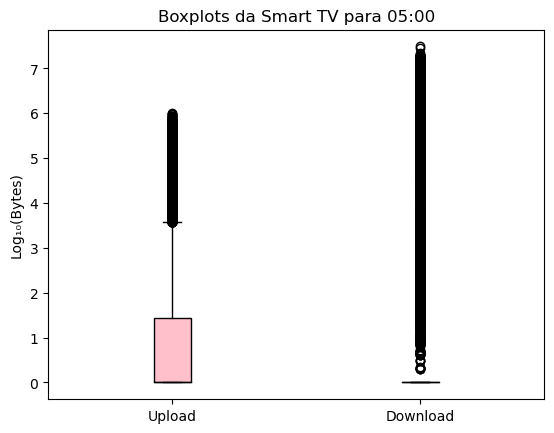

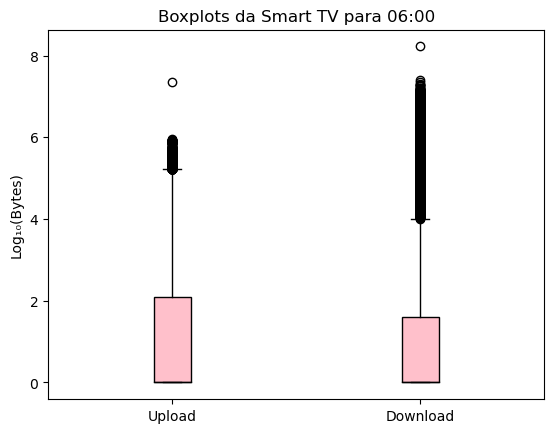

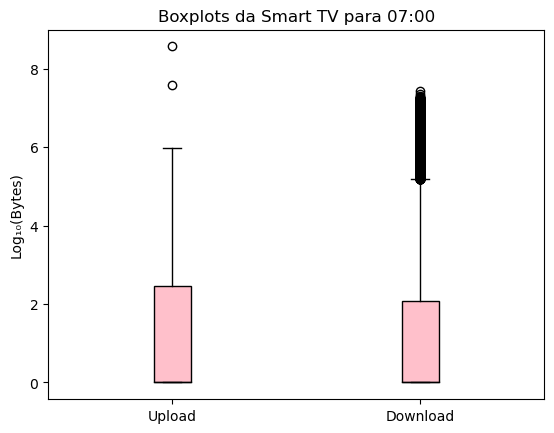

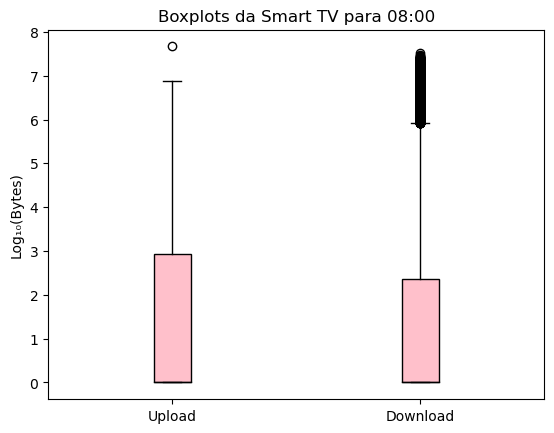

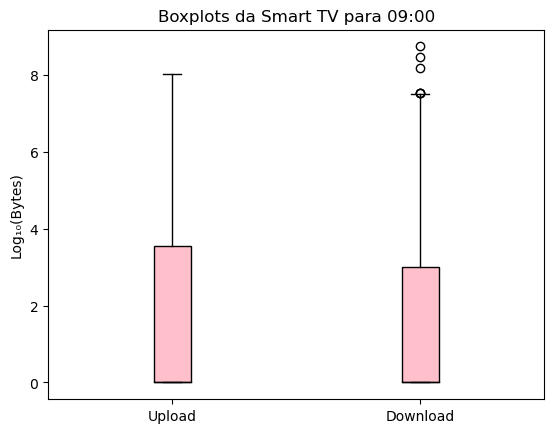

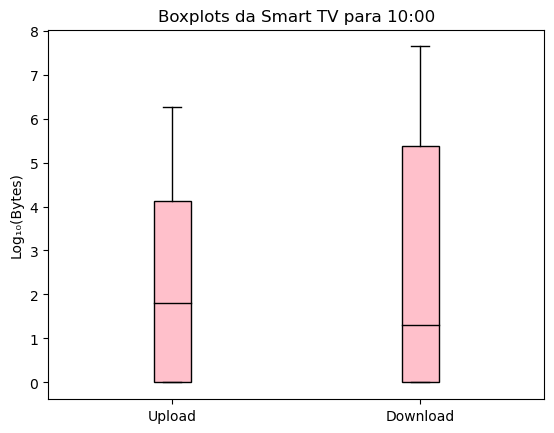

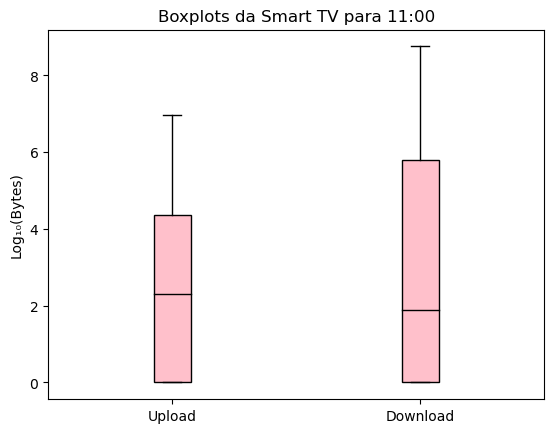

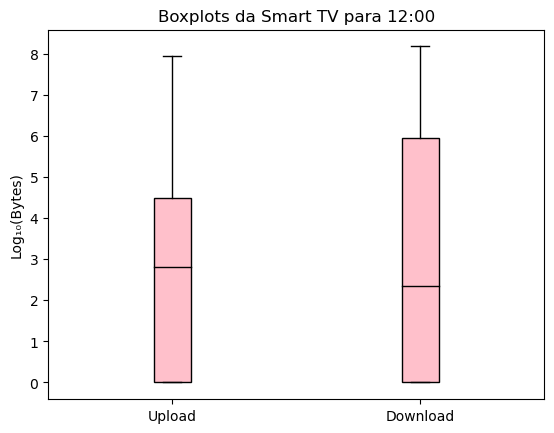

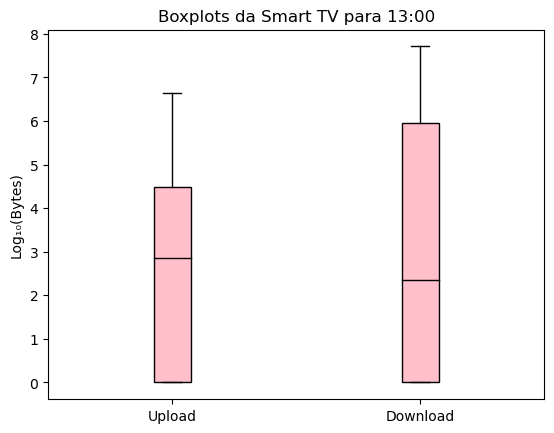

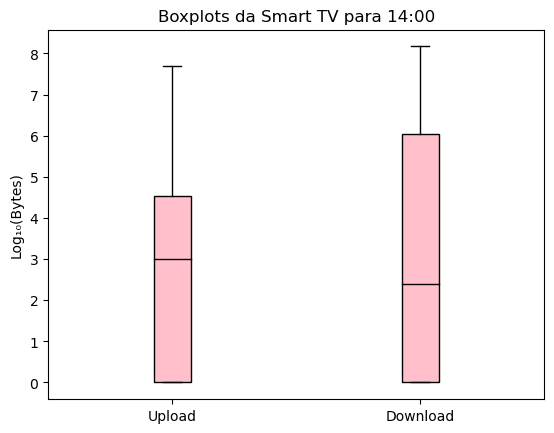

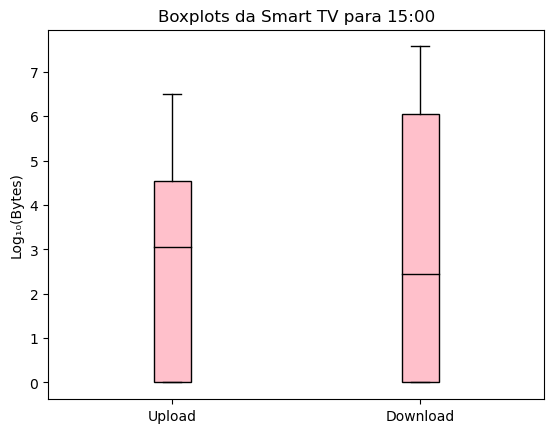

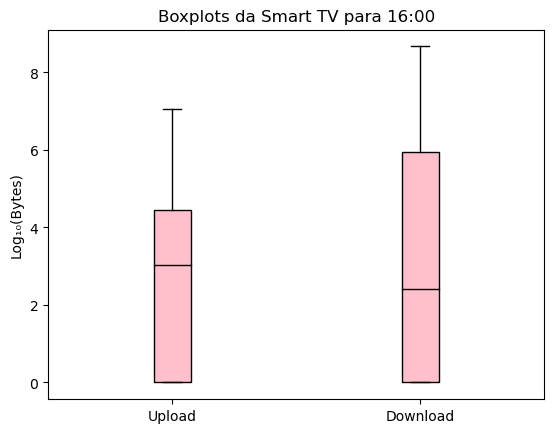

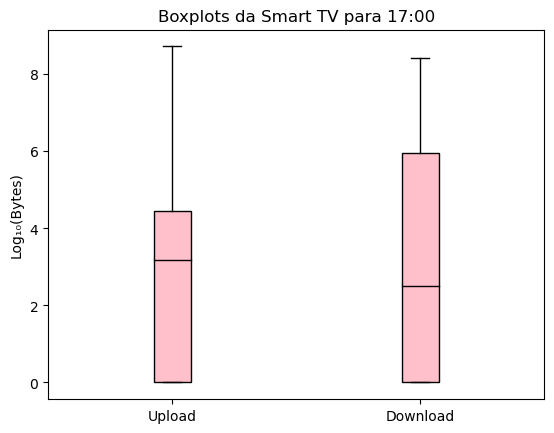

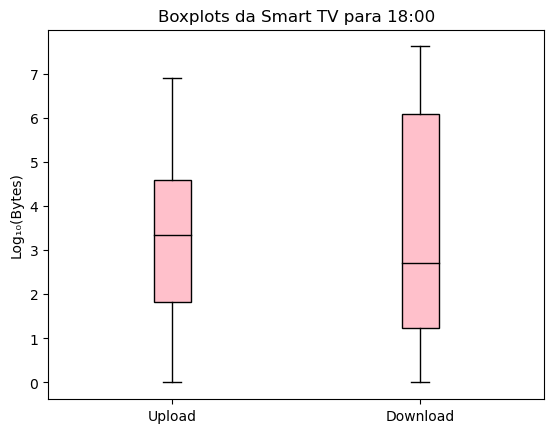

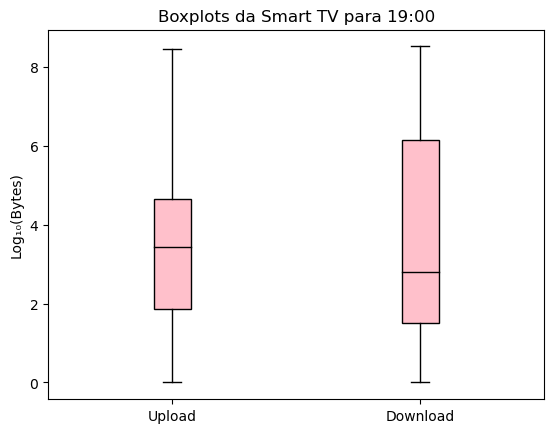

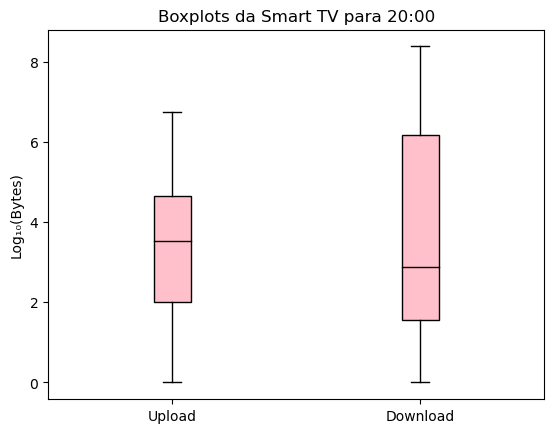

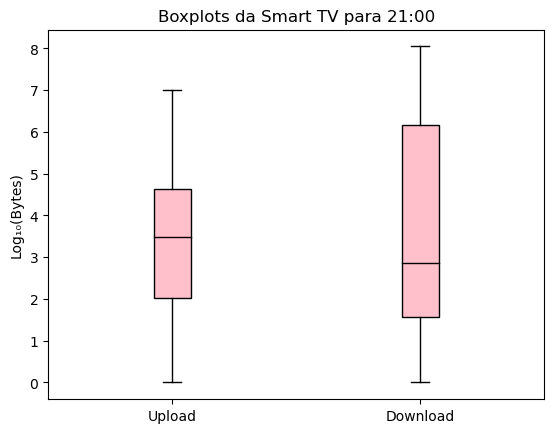

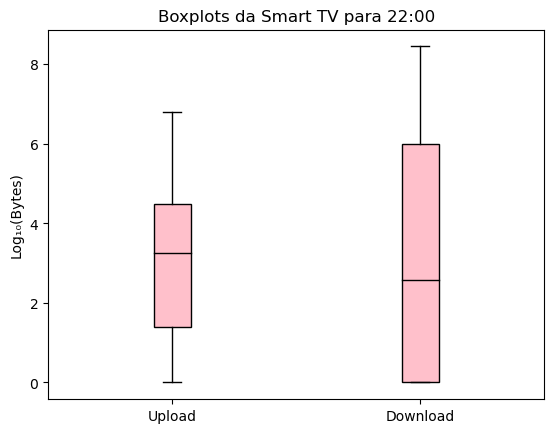

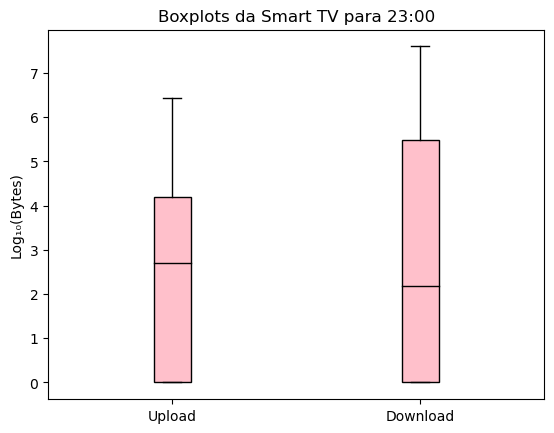

In [21]:
for hour in range(0, 24):
    fig = plt.figure()
    plt.boxplot(
        [
            df_smart_tv[df_smart_tv["hour"] == hour]["log_bytes_up"],
            df_smart_tv[df_smart_tv["hour"] == hour]["log_bytes_down"],
        ],
        labels=["Upload", "Download"],
        patch_artist=True,
        boxprops=dict(facecolor="pink", color="black"),
        medianprops=dict(color="black"),
        whiskerprops=dict(color="black"),
        capprops=dict(color="black"),
    )
    plt.ylabel("Log₁₀(Bytes)")
    plt.title(f"Boxplots da Smart TV para {hour:02d}:00")

## Média, Variância e Desvio Padrão

### Chromecast


Text(0.5, 1.0, 'Estatísticas de Upload por Hora do Chromecast')

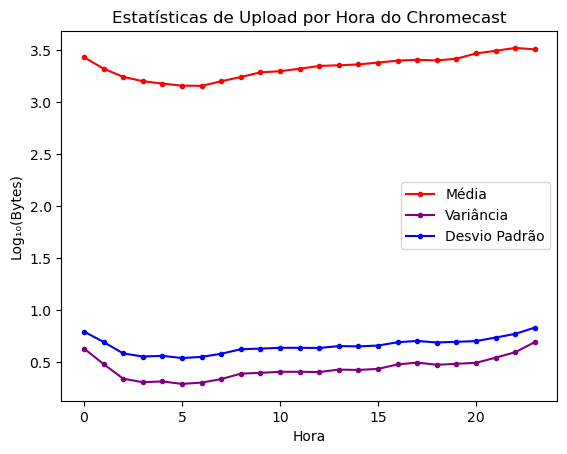

In [22]:
fig = plt.figure()
plt.plot(
    df_chromecast.groupby("hour")["log_bytes_up"].mean(),
    color="red",
    marker=".",
    label="Média",
)
plt.plot(
    df_chromecast.groupby("hour")["log_bytes_up"].var(),
    color="purple",
    marker=".",
    label="Variância",
)
plt.plot(
    df_chromecast.groupby("hour")["log_bytes_up"].std(),
    color="blue",
    marker=".",
    label="Desvio Padrão",
)
plt.xlabel("Hora")
plt.ylabel("Log₁₀(Bytes)")
plt.legend(loc="best")
plt.title("Estatísticas de Upload por Hora do Chromecast")

Text(0.5, 1.0, 'Estatísticas de Download por Hora do Chromecast')

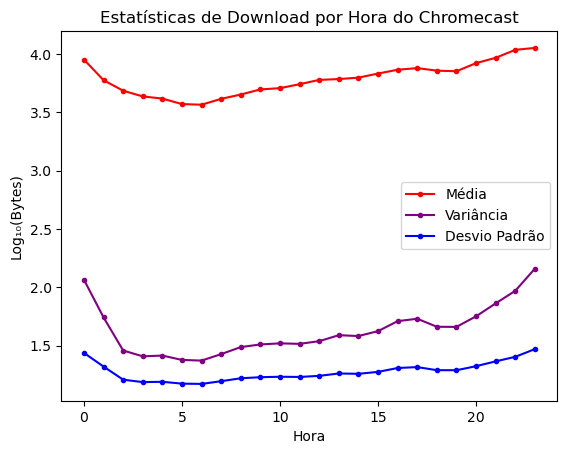

In [23]:
fig = plt.figure()
plt.plot(
    df_chromecast.groupby("hour")["log_bytes_down"].mean(),
    color="red",
    marker=".",
    label="Média",
)
plt.plot(
    df_chromecast.groupby("hour")["log_bytes_down"].var(),
    color="purple",
    marker=".",
    label="Variância",
)
plt.plot(
    df_chromecast.groupby("hour")["log_bytes_down"].std(),
    color="blue",
    marker=".",
    label="Desvio Padrão",
)
plt.xlabel("Hora")
plt.ylabel("Log₁₀(Bytes)")
plt.legend(loc="best")
plt.title("Estatísticas de Download por Hora do Chromecast")

### Smart TV

Text(0.5, 1.0, 'Estatísticas de Upload por Hora da Smart TV')

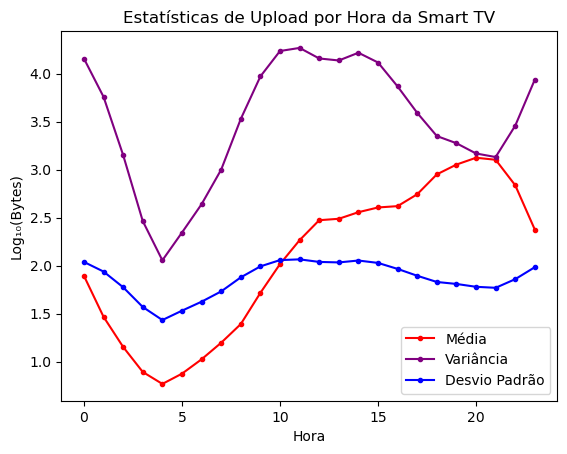

In [24]:
fig = plt.figure()
plt.plot(
    df_smart_tv.groupby("hour")["log_bytes_up"].mean(),
    color="red",
    marker=".",
    label="Média",
)
plt.plot(
    df_smart_tv.groupby("hour")["log_bytes_up"].var(),
    color="purple",
    marker=".",
    label="Variância",
)
plt.plot(
    df_smart_tv.groupby("hour")["log_bytes_up"].std(),
    color="blue",
    marker=".",
    label="Desvio Padrão",
)
plt.xlabel("Hora")
plt.ylabel("Log₁₀(Bytes)")
plt.legend(loc="best")
plt.title("Estatísticas de Upload por Hora da Smart TV")

Text(0.5, 1.0, 'Estatísticas de Upload por Hora da Smart TV')

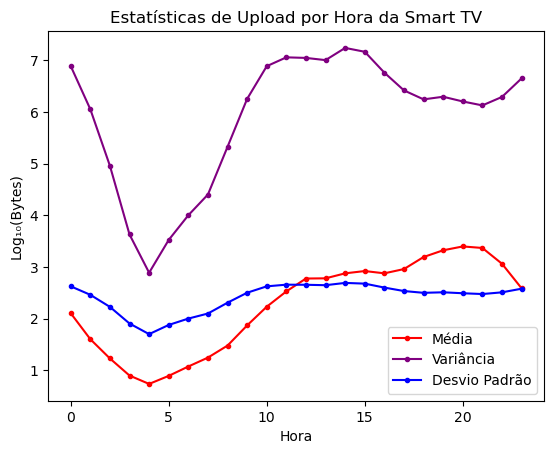

In [25]:
fig = plt.figure()
plt.plot(
    df_smart_tv.groupby("hour")["log_bytes_down"].mean(),
    color="red",
    marker=".",
    label="Média",
)
plt.plot(
    df_smart_tv.groupby("hour")["log_bytes_down"].var(),
    color="purple",
    marker=".",
    label="Variância",
)
plt.plot(
    df_smart_tv.groupby("hour")["log_bytes_down"].std(),
    color="blue",
    marker=".",
    label="Desvio Padrão",
)
plt.xlabel("Hora")
plt.ylabel("Log₁₀(Bytes)")
plt.legend(loc="best")
plt.title("Estatísticas de Upload por Hora da Smart TV")

# Caracterizando os horários com maior valor de tráfego

## Chromecast

### Filtrar o Dataset

In [26]:
hour_of_max_mean_up_chromecast = (df_chromecast.groupby("hour")["log_bytes_up"].mean().idxmax())
hour_of_max_mean_down_chromecast = (df_chromecast.groupby("hour")["log_bytes_down"].mean().idxmax())

print(f"Hora da Média máxima UP / DOWN: {hour_of_max_mean_up_chromecast} / {hour_of_max_mean_down_chromecast}")

Hora da Média máxima UP / DOWN: 22 / 23


In [27]:
df_chromecast_max_mean_up = df_chromecast[(df_chromecast["hour"] == hour_of_max_mean_up_chromecast)][["hour", "bytes_up", "log_bytes_up", "device_id"]]
df_chromecast_max_mean_down = df_chromecast[(df_chromecast["hour"] == hour_of_max_mean_down_chromecast)][["hour", "bytes_down", "log_bytes_down", "device_id"]]

### Histograma

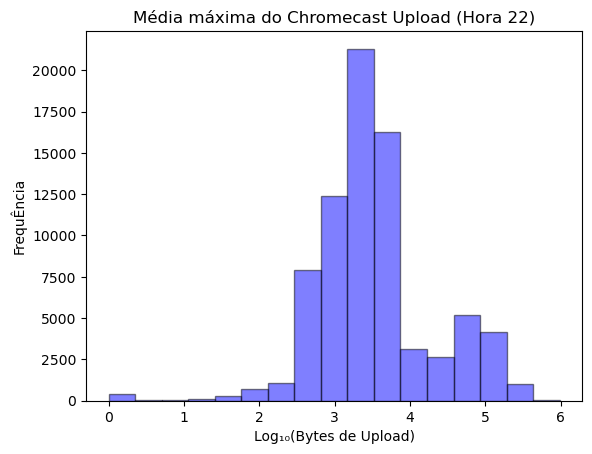

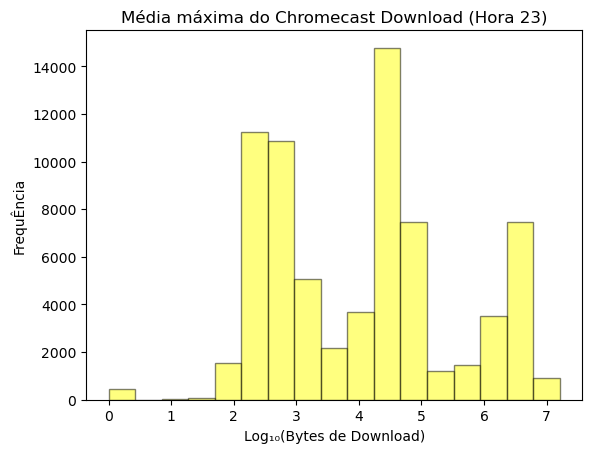

In [28]:
for df, column, name, figure_name in [
    (df_chromecast_max_mean_up, "log_bytes_up", "Média máxima do Chromecast Upload (Hora 22)", "chromecast_max_mean_up"),
    (df_chromecast_max_mean_down, "log_bytes_down", "Média máxima do Chromecast Download (Hora 23)", "chromecast_max_mean_down"),
]:
    chromecast_hist_bin = get_bin(df[column])
    fig = plt.figure()
    plt.hist(
        df[column],
        bins=chromecast_hist_bin,
        color=("blue" if column == "log_bytes_up" else "yellow"),
        alpha=0.5,
        edgecolor="black",
    )
    plt.xlabel("Log₁₀(Bytes de Upload)" if column == "log_bytes_up" else "Log₁₀(Bytes de Download)")
    plt.ylabel("FrequÊncia")
    plt.title(f"{name}")

### Q-Q Plot

<function matplotlib.pyplot.show(close=None, block=None)>

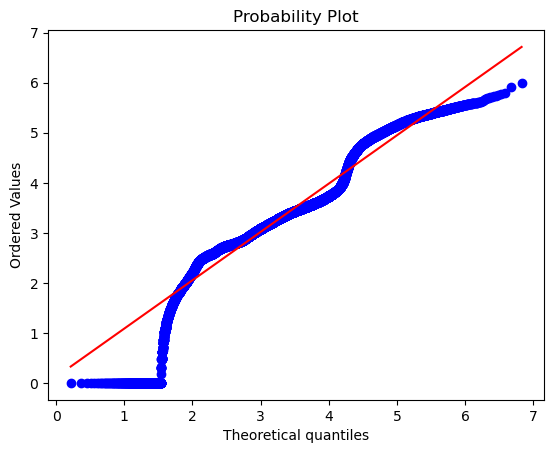

In [29]:
df = df_chromecast_max_mean_up
column = "log_bytes_up"
x=df[column]
stats.probplot(x, sparams=(df[column].mean(), df[column].std()), plot=pylab)
pylab.show

<function matplotlib.pyplot.show(close=None, block=None)>

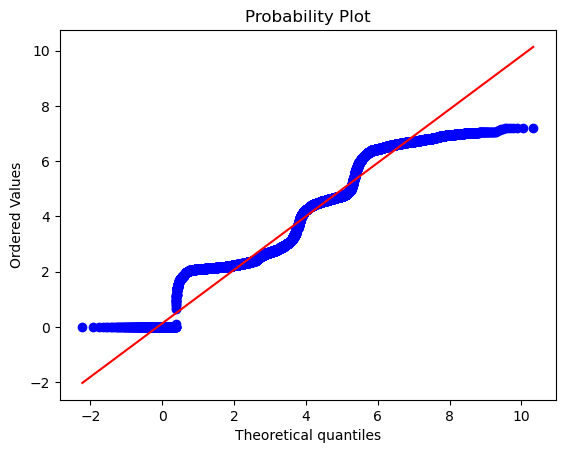

In [30]:
df = df_chromecast_max_mean_down
column = "log_bytes_down"
x=df[column]
stats.probplot(x, sparams=(df[column].mean(), df[column].std()), plot=pylab)
pylab.show

## Smart TV

### Filtrar o Dataset

In [31]:

hour_of_max_mean_up_smart_tv = (df_smart_tv.groupby("hour")["log_bytes_up"].mean().idxmax())
hour_of_max_mean_down_smart_tv = (df_smart_tv.groupby("hour")["log_bytes_down"].mean().idxmax())

print(f"Hora da Média máxima UP / DOWN: {hour_of_max_mean_up_smart_tv} / {hour_of_max_mean_down_smart_tv}")

Hora da Média máxima UP / DOWN: 20 / 20


In [32]:
df_smart_tv_max_mean_up = df_smart_tv[(df_smart_tv["hour"] == hour_of_max_mean_up_smart_tv)][["hour", "bytes_up", "log_bytes_up", "device_id"]]
df_smart_tv_max_mean_down = df_smart_tv[(df_smart_tv["hour"] == hour_of_max_mean_down_smart_tv)][["hour", "bytes_down", "log_bytes_down", "device_id"]]

### Histograma

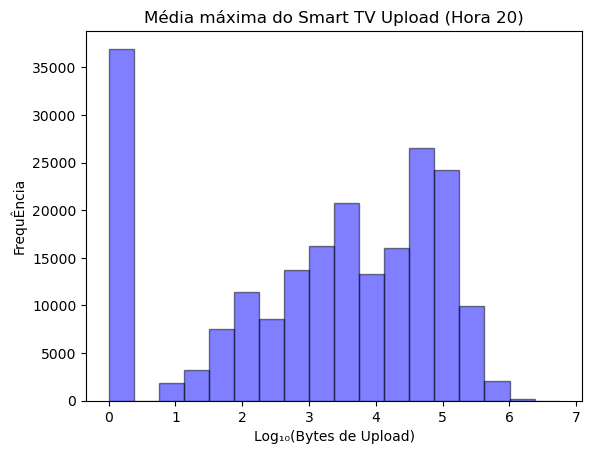

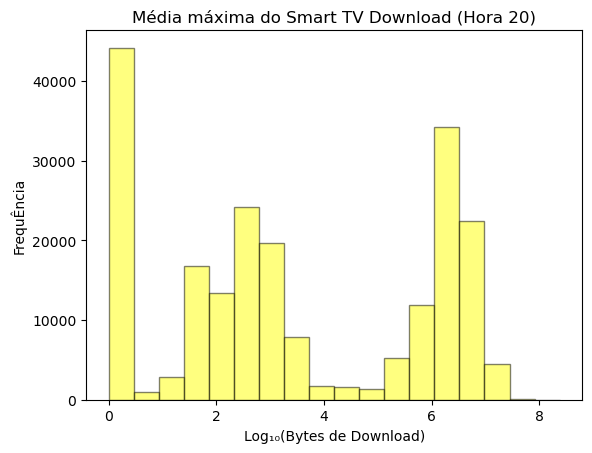

In [33]:
for df, column, name, figure_name in [
    (df_smart_tv_max_mean_up, "log_bytes_up", "Média máxima do Smart TV Upload (Hora 20)", "smart_tv_max_mean_up"),
    (df_smart_tv_max_mean_down, "log_bytes_down", "Média máxima do Smart TV Download (Hora 20)", "smart_tv_max_mean_down"),
]:
    smart_tv_hist_bin = get_bin(df[column])
    fig = plt.figure()
    plt.hist(
        df[column],
        bins=smart_tv_hist_bin,
        color=("blue" if column == "log_bytes_up" else "yellow"),
        alpha=0.5,
        edgecolor="black",
    )
    plt.xlabel("Log₁₀(Bytes de Upload)" if column == "log_bytes_up" else "Log₁₀(Bytes de Download)")
    plt.ylabel("FrequÊncia")
    plt.title(f"{name}")
    fig.savefig(
        fR"C:\Users\luizg\Downloads\img\{figure_name}.png",
        dpi=fig.dpi,
    )

### Q-Q Plot

<function matplotlib.pyplot.show(close=None, block=None)>

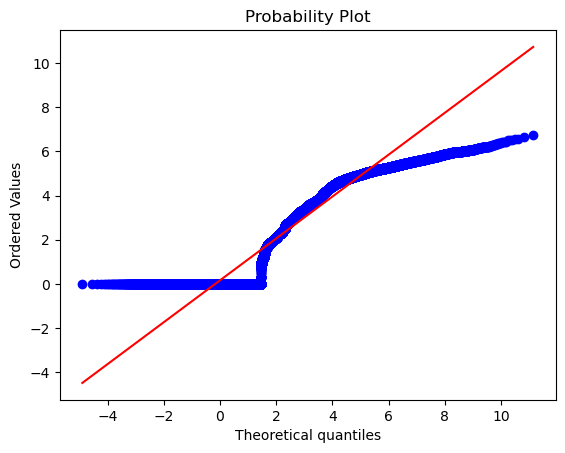

In [34]:
df = df_smart_tv_max_mean_up
column = "log_bytes_up"
x=df[column]
stats.probplot(x, sparams=(df[column].mean(), df[column].std()), plot=pylab)
pylab.show

<function matplotlib.pyplot.show(close=None, block=None)>

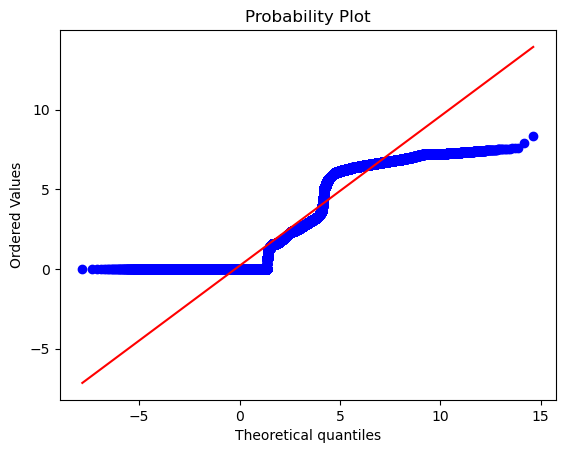

In [35]:
df = df_smart_tv_max_mean_down
column = "log_bytes_down"
x=df[column]
stats.probplot(x, sparams=(df[column].mean(), df[column].std()), plot=pylab)
pylab.show

# Análise da correlação entre as taxas de upload e download para os hor ́arios com o maior valorde tráfego

Coeficiente de correlação amostral entre os datasets: 0.0022225921558023686


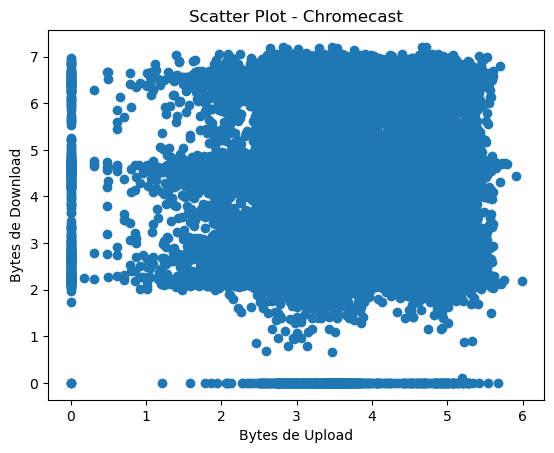

Coeficiente de correlação amostral entre os datasets: 0.9156089964784199


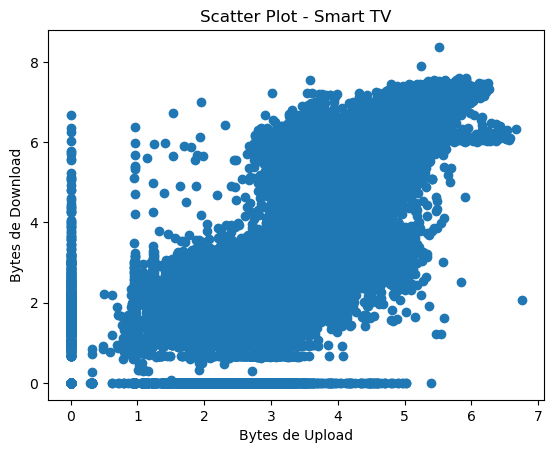

In [36]:
for df1, df2, name in [
    (df_chromecast_max_mean_up, df_chromecast_max_mean_down , "Scatter Plot - Chromecast"),
    (df_smart_tv_max_mean_up, df_smart_tv_max_mean_down, "Scatter Plot - Smart TV")
]:
    
    if df1.shape[0] != df2.shape[0]:
        if df1.shape[0] > df2.shape[0]:
            df1 = df1.sample(n=df2.shape[0])
        else:
            df2 = df2.sample(n=df1.shape[0])

    coeficiente = stats.pearsonr(df1["log_bytes_up"], df2["log_bytes_down"])
    print(f"Coeficiente de correlação amostral entre os datasets: {coeficiente[0]}")

    plt.scatter(df1["log_bytes_up"], df2["log_bytes_down"])
    plt.title(name)
    plt.xlabel("Bytes de Upload")
    plt.ylabel("Bytes de Download")
    plt.show()